# Подготовка модели распознавания рукописных букв и цифр

Вам предстоит самостоятельно обучить модель для задачи распознавания рукописных букв и цифр с помощью датасета `emnist`. Результатом должна быть обученная модель, сохранённая в файл `model.pkl`.

Можете воспользоваться предложенным порядком действий и подсказками из этого ноутбука или подойти к решению задачи самостоятельно и написать всё с нуля. То же касается и процесса упаковки модели в сервис для распознавания самостоятельно написанных символов.

В этом ноутбуке комментариями и символами `...` отмечены места для вашего кода.

Перед отправкой решения убедитесь, что все ячейки ноутбука выполняются последовательно без ошибок, если запустить `Kernel -> Restart & Run All`.

Успехов!

### 1. Установите и импортируйте необходимые библиотеки

In [36]:
!pip install emnist
# your pip installs here

In [37]:
import os
import pickle
import emnist
import pandas as pd
# your imports here

### 2. Загрузите датасет и проанализируйте его

Датасет в качестве лейблов (или таргетов) содержит числа от 0 до 46. Каждому числу соответствует ASCII-код некоторого символа. Пары «лейбл — код» хранятся в файле `emnist-balanced-mapping.txt`.
Выведите на экран количество семплов в каждом сплите датасета и размер изображений. Также для каждого лейбла выведите соответствующий ему символ и количество тренировочных семплов, приходящееся на него.
Посмотрите на несколько примеров изображений.

_Подсказка: чтобы получить символ из ASCII-кода, нужно воспользоваться функцией_ `chr()`. _Для вашего удобства можно построить словарь_ (`dict`) _соответствий._

In [38]:
images_train, labels_train = emnist.extract_training_samples('balanced')
images_test, labels_test = emnist.extract_test_samples('balanced')
print(f'Train:\n{pd.DataFrame(labels_train).value_counts().sort_index(ascending=False)} samples')
print(f'Test:\n{pd.DataFrame(labels_test).value_counts().sort_index(ascending=False)} samples')
print(f'Image size: {images_train.shape[1:]}')

Train:
0 
46    2400
45    2400
44    2400
43    2400
42    2400
41    2400
40    2400
39    2400
38    2400
37    2400
36    2400
35    2400
34    2400
33    2400
32    2400
31    2400
30    2400
29    2400
28    2400
27    2400
26    2400
25    2400
24    2400
23    2400
22    2400
21    2400
20    2400
19    2400
18    2400
17    2400
16    2400
15    2400
14    2400
13    2400
12    2400
11    2400
10    2400
9     2400
8     2400
7     2400
6     2400
5     2400
4     2400
3     2400
2     2400
1     2400
0     2400
Name: count, dtype: int64 samples
Test:
0 
46    400
45    400
44    400
43    400
42    400
41    400
40    400
39    400
38    400
37    400
36    400
35    400
34    400
33    400
32    400
31    400
30    400
29    400
28    400
27    400
26    400
25    400
24    400
23    400
22    400
21    400
20    400
19    400
18    400
17    400
16    400
15    400
14    400
13    400
12    400
11    400
10    400
9     400
8     400
7     400
6     400
5     400
4     400


In [39]:
# your code here
a = [i[0] for i in list(pd.DataFrame(labels_train).value_counts().sort_index(ascending=False).keys())]
{i:chr(i) for i in a}

{46: '.',
 45: '-',
 44: ',',
 43: '+',
 42: '*',
 41: ')',
 40: '(',
 39: "'",
 38: '&',
 37: '%',
 36: '$',
 35: '#',
 34: '"',
 33: '!',
 32: ' ',
 31: '\x1f',
 30: '\x1e',
 29: '\x1d',
 28: '\x1c',
 27: '\x1b',
 26: '\x1a',
 25: '\x19',
 24: '\x18',
 23: '\x17',
 22: '\x16',
 21: '\x15',
 20: '\x14',
 19: '\x13',
 18: '\x12',
 17: '\x11',
 16: '\x10',
 15: '\x0f',
 14: '\x0e',
 13: '\r',
 12: '\x0c',
 11: '\x0b',
 10: '\n',
 9: '\t',
 8: '\x08',
 7: '\x07',
 6: '\x06',
 5: '\x05',
 4: '\x04',
 3: '\x03',
 2: '\x02',
 1: '\x01',
 0: '\x00'}

### 3. Подготовьте датасет для обучения и валидации

_Подсказка: чтобы вытянуть изображения в вектор, понадобится метод_ `reshape` _из библиотеки_ `numpy`.

In [40]:
import numpy as np
target = 'label'
tr_data = pd.DataFrame(np.hstack([images_train.reshape(images_train.shape[0], 28*28), labels_train.reshape(-1, 1)]), columns=[str(i) for i in range(785)]).rename(columns={'784':target})
te_data = pd.DataFrame(np.hstack([images_test.reshape(images_test.shape[0], 28*28), labels_test.reshape(-1, 1)]), columns=[str(i) for i in range(785)]).rename(columns={'784':target})

In [41]:
tr_data

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,43
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22
112796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
112797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,23
112798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,31


In [42]:
X_train = tr_data.drop([target], axis=1)
y_train = tr_data[target]
X_test = te_data.drop([target], axis=1)
y_test = te_data[target]

print('Train:', X_train.shape)
print('Test:', X_test.shape)

Train: (112800, 784)
Test: (18800, 784)


### 4. Выберите модель, обучите её, протестируйте и сохраните

Выведите на экран точность вашей модели. Выведите и проанализируйте матрицу ошибок. Какие два символа она чаще всего путает? На каком символе модель чаще всего ошибается?

In [35]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
clf.fit(X_train, y_train)
# your code here

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test, clf.predict(X_test))

0.6954255319148936

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

/opt/anaconda3/envs/lightautoml/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, clf_lr.predict(X_test))

0.6871276595744681

In [ ]:
from sklearn.svm import SVC
clf_svc = SVC()
clf_svc.fit(X_train, y_train)

SVC()

In [ ]:
X_train.iloc[0,:].size

784

In [ ]:
print(X_train.iloc[0,:].shape)
print(np.array(X_train.iloc[0,:]).shape)

clf_svc.predict(np.array(X_train.iloc[0,:]).reshape(1,-1))

(784,)
(784,)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([45], dtype=uint8)

In [ ]:
from sklearn.metrics import accuracy_score

pred_svc = clf_svc.predict(X_test)
accuracy_score(y_test, pred_svc)

0.8428191489361702

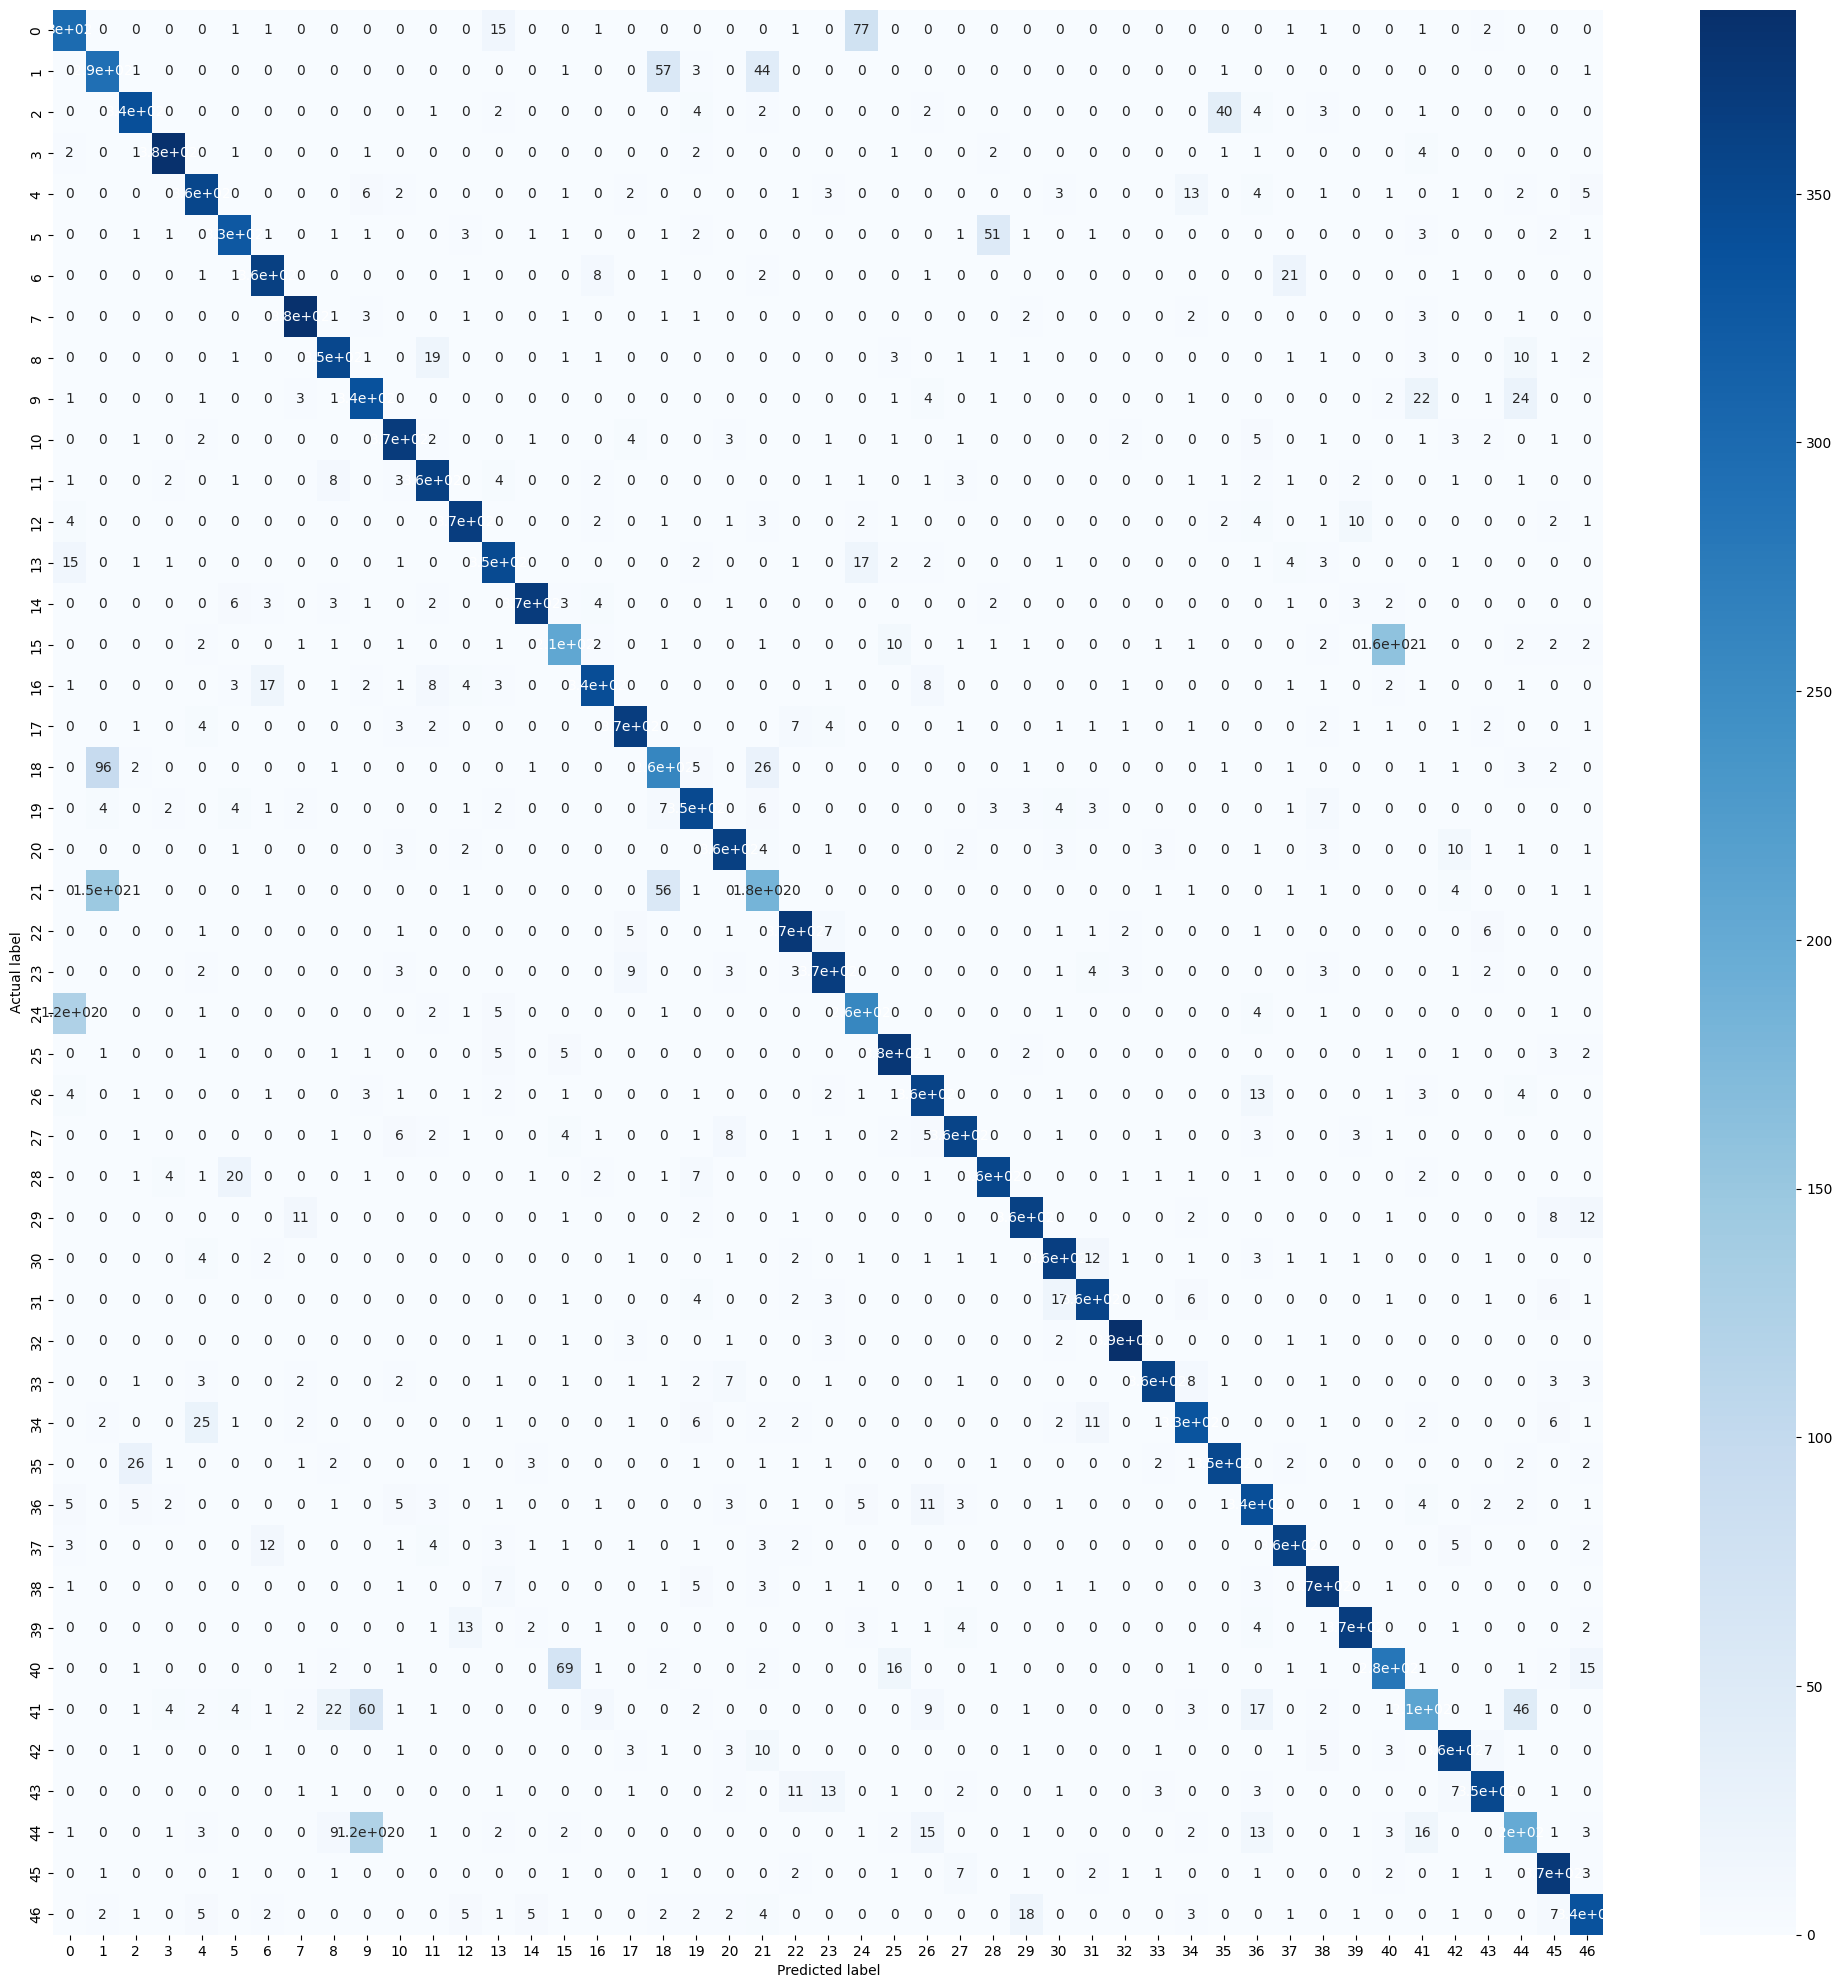

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25,25))
sns.heatmap(confusion_matrix(y_test, pred_svc), annot=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

Модель чаще всего путает 40 и 15, 1 и 4 действительно похожи, как и нижняя часть пятёрки и 0

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf_svc, X_test, y_test, cv=3, scoring='accuracy')

array([0.76208712, 0.76926759, 0.76204915])

In [ ]:
import dill

with open('myapp/SVC.pkl', 'wb') as f:
    dill.dump(clf_svc, f)

Лучше всех себя показала модель SVC(), но она отрабатывает слишком долго, на больших датасетах не стоит использовать, возьму лучше MLPClassifier

In [ ]:
def predict(data, labels):
    clf = pd.read_pickle('LR.pkl')
    magic_number = int.from_bytes(data[0:4], byteorder='big')
    num_images = int.from_bytes(data[4:8], byteorder='big')
    num_rows = int.from_bytes(data[8:12], byteorder='big')
    num_cols = int.from_bytes(data[12:16], byteorder='big')
    images = np.frombuffer(data[16:], dtype=np.uint8).reshape(num_images, num_rows, num_cols)
    labels_int = np.array(np.frombuffer(labels, dtype=np.uint8))
    magic_number_label = int.from_bytes(labels_int[0:4], byteorder='big')
    num_labels = int.from_bytes(labels_int[4:8], byteorder='big')
    labels_int = np.array(np.frombuffer(labels, dtype=np.uint8, offset=8))
    delayed_test = pd.concat([pd.DataFrame(images.reshape(images.shape[0], -1),columns=range(images.shape[1]*images.shape[2])), pd.DataFrame(labels_int, columns=['label'])], axis=1)
    score = accuracy_score(delayed_test['label'], clf.predict(delayed_test.drop(['label'], axis=1)))
    return score


In [43]:
import gzip
with gzip.open('gzip/emnist-balanced-test-images-idx3-ubyte.gz', 'rb') as f:
    data = f.read()

In [44]:
magic_number = int.from_bytes(data[0:4], byteorder='big')
num_images = int.from_bytes(data[4:8], byteorder='big')
num_rows = int.from_bytes(data[8:12], byteorder='big')
num_cols = int.from_bytes(data[12:16], byteorder='big')

print(f"Magic Number: {magic_number}")
print(f"Number of Images: {num_images}, Rows: {num_rows}, Cols: {num_cols}")

images = np.frombuffer(data[16:], dtype=np.uint8).reshape(num_images, num_rows, num_cols)

Magic Number: 2051
Number of Images: 18800, Rows: 28, Cols: 28


In [50]:
!pip install idx2numpy

  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7904 sha256=d6aa4d22e94f1c355d1c63ff4e1edb58967b1e53c1a5804f3ef5c124b9e07cea
  Stored in directory: /Users/user/Library/Caches/pip/wheels/f7/48/00/ae031c97d62f39e1c3c4daa00426c09a65eb29ae5753a189ee
Successfully built idx2numpy


In [51]:
import idx2numpy
import base64
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
image = images[0]

iVBORw0KGgoAAAANSUhEUgAAABwAAAAcCAAAAABXZoBIAAABXUlEQVR4nGNgGGSAEasoExPDH1yS7K6GX3ff+M3Agk2Sx9vhC/vTd9glGVjlOLjWvEO2h4UFppJRZeOfm6oMcJ3s6iraTJ/WP2BgYGBg+P/wgicDA0xSSMSyQFKQ8Qdv1w8GBgYGBjYehHfE6669+v3r15+/pxQgcgF3/kGNZVSq8Rb+d+jKBzvrx18ZGBg4JIO85Bk+/WZgYGFgYDO3Fvz//fiel4IWr38wMLDImEcoMP+5/5WBgYWBQbJA+f/hrWueM/9iYGdmV3e101Fg/Htw5luIg778Ybq6k01O2pX5i4xxgRo708/nr6cc/AfxsfX5329u3rx57+e/N7de/f336/MSEwV2WMCzuye5s0Nd/vfd4/0v1j34jwgcZv3D3//9//fv+73rq0KUONGClFV/8eefX+/MN1EVZUYShqj6fXuHOu/X/Yeu//z3D0kSFp/skqy/X/5ElhmMAAAian/K8SrkaAAAAABJRU5ErkJggg==


In [58]:
import re
numbers = re.sub(r'[^\d]', ' ', str(image)).split()
result = ','.join(numbers)

# Выводим результат
print(result)

0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,76,125,114,45,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,151,215,203,121,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,156,245,253,213,37,0,0,0,0,0,0,0,0,0,0,0,2,4,4,4,0,0,0,0,0,0,0,1,36,177,252,217,37,0,0,0,0,0,0,0,0,0,7,46,82,125,127,113,32,0,0,0,0,0,0,0,5,129,250,217,37,0,0,0,0,0,0,0,18,38,95,207,232,249,250,242,126,8,0,0,0,0,0,0,11,141,250,217,37,0,0,0,0,0,1,23,126,214,234,251,250,250,252,253,202,32,0,0,0,0,0,6,80,220,254,217,37,0,0,0,0,1,35,159,234,253,251,189,145,129,191,250,173,21,0,0,0,8,33,115,189,251,254,203,32,0,0,0,0,7,90,218,251,252,242,132,64,41,146,247,152,13,0,0,4,36,91,203,235,254,250,170

In [64]:
form = {"image":"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,76,125,114,45,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,151,215,203,121,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,156,245,253,213,37,0,0,0,0,0,0,0,0,0,0,0,2,4,4,4,0,0,0,0,0,0,0,1,36,177,252,217,37,0,0,0,0,0,0,0,0,0,7,46,82,125,127,113,32,0,0,0,0,0,0,0,5,129,250,217,37,0,0,0,0,0,0,0,18,38,95,207,232,249,250,242,126,8,0,0,0,0,0,0,11,141,250,217,37,0,0,0,0,0,1,23,126,214,234,251,250,250,252,253,202,32,0,0,0,0,0,6,80,220,254,217,37,0,0,0,0,1,35,159,234,253,251,189,145,129,191,250,173,21,0,0,0,8,33,115,189,251,254,203,32,0,0,0,0,7,90,218,251,252,242,132,64,41,146,247,152,13,0,0,4,36,91,203,235,254,250,170,21,0,0,0,0,32,202,253,252,191,116,32,7,10,140,247,159,16,7,46,115,177,221,253,254,251,187,67,2,0,0,0,0,32,190,249,251,148,45,38,37,64,209,250,147,44,95,207,245,252,254,247,222,201,79,4,0,0,0,0,0,5,59,207,251,236,217,217,217,222,249,254,236,218,234,253,254,250,243,164,52,32,7,0,0,0,0,0,0,0,7,78,176,247,254,254,254,254,254,254,254,254,251,233,204,139,115,33,1,0,0,0,0,0,0,0,0,0,0,3,47,195,247,254,255,254,254,247,222,215,170,84,34,9,4,0,0,0,0,0,0,0,0,0,0,0,0,0,5,47,163,243,249,245,220,159,52,37,21,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,91,202,215,204,139,77,11,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,32,37,32,9,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0"}
df = pd.DataFrame(np.array(dict(form)['image'].split(',')).reshape(1,-1))
m = pd.read_pickle('./myapp/SVC.pkl')
m.predict(df)
df.to_pickle('ee.pkl')

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [81]:
with gzip.open('gzip/emnist-balanced-test-labels-idx1-ubyte.gz', 'rb') as f:
    labels = f.read()
type(labels)


bytes

In [115]:
labels_int = np.array(np.frombuffer(labels, dtype=np.uint8))
magic_number_label = int.from_bytes(labels_int[0:4], byteorder='big')
num_labels = int.from_bytes(labels_int[4:8], byteorder='big')
labels_int = np.array(np.frombuffer(labels, dtype=np.uint8, offset=8))
print(f"Magic Number: {magic_number_label}")
print(f"Number of labels: {num_labels}")
labels_int.shape

Magic Number: 2049
Number of labels: 18800


(18800,)

In [127]:
delayed_test = pd.concat([pd.DataFrame(images.reshape(images.shape[0], -1),columns=[str(i) for i in range(images.shape[1]*images.shape[2])]), pd.DataFrame(labels_int, columns=['label'])], axis=1)
delayed_test

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,41
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,39
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45
18796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
18797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26


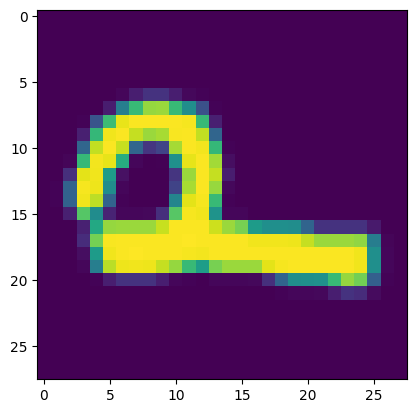

In [144]:
import matplotlib.pyplot as plt
import gzip
with gzip.open('gzip/emnist-balanced-test-images-idx3-ubyte.gz', 'rb') as f:
    data = f.read()
images = np.frombuffer(data[16:], dtype=np.uint8).reshape(num_images, num_rows, num_cols)
plt.imshow(images[4])

In [125]:
accuracy_score(delayed_test['label'], clf_svc.predict(delayed_test.drop(['label'], axis=1)))

/opt/anaconda3/envs/lightautoml/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.09063829787234043

In [130]:
accuracy_score(delayed_test['label'], clf_lr.predict(delayed_test.drop(['label'], axis=1)))

0.0650531914893617

In [105]:
with open(os.path.join('myapp', 'model.pkl'),'wb') as f:
    pickle.dump(clf, f)